In [ ]:
#1
import numpy as np
from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

df = pd.read_csv("ZIONO_weekly_return_volatility.csv")
df.label = df.label.fillna(method='ffill')
df_21 = df[df.Year==2021]
df_22 = df[df.Year==2022]

df_22.head(10)


df_22.head() # mean


,Year,Week_Number,mean_return,volatility,label
54,2022,1,-0.2012,0.842329,red
55,2022,2,0.1002,0.604448,green
56,2022,3,0.1525,0.591757,green
57,2022,4,-0.3576,1.847664,red
58,2022,5,-0.1206,0.762250,red


In [ ]:
# 1 , construct df_train
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy import stats

x_21 = df_21[["mean_return"]].values
le = LabelEncoder()
y_21 = le.fit_transform(df_21["label"].values)
y_22 = le.transform(df_22["label"].values)


df_train = pd.DataFrame({'mean_return': df_21["mean_return"].values, 'volatility':df_21['volatility'].values, 'y': y_21})
df_train.head()

,mean_return,volatility,y
0,-0.2586,0.729467,0
1,0.0776,0.787634,1
2,0.9710,2.437100,0
3,-0.5042,1.114784,1
4,0.1458,1.217830,0


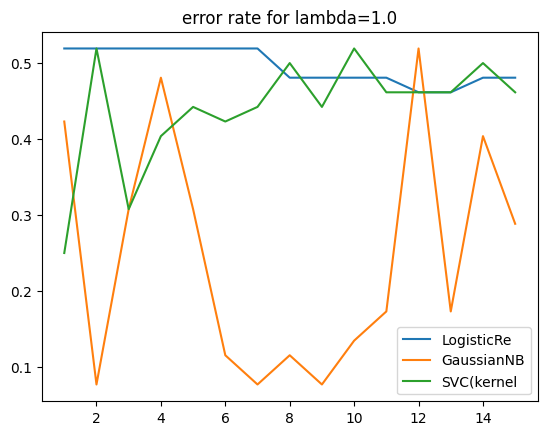

(LogisticRe    12
 GaussianNB     2
 SVC(kernel     1
 dtype: int64,
 LogisticRe    0.461538
 GaussianNB    0.076923
 SVC(kernel    0.250000
 dtype: float64)

In [ ]:
from sklearn . ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn .svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn . ensemble import AdaBoostClassifier


X = df_train[["mean_return", "volatility"]].values
Y = df_train.y.values

df = pd.DataFrame()

base_estimator_list = [LogisticRegression(), GaussianNB (),
                        SVC(probability =True, kernel ='linear'),]
learn_rate = 1.0
for be in base_estimator_list:
    
    dic = {}
    for N in range(1, 16):
        
        clf = AdaBoostClassifier(n_estimators=N, estimator =be, learning_rate=learn_rate)
        clf.fit(X, Y)
        new_x = df_22[["mean_return", "volatility"]].values
        predicted = clf.predict(new_x)
        

        # 1 accuracy
        dic[N] = np.mean(predicted == y_22)
#         print(dic[N])
    df[f"{be}"[:10]] = 1- pd.Series(dic)
   
# 1 plot for lambda = 1
df.plot()
plt.title("error rate for lambda=1.0")
plt.show()

df.idxmin(), df.min()


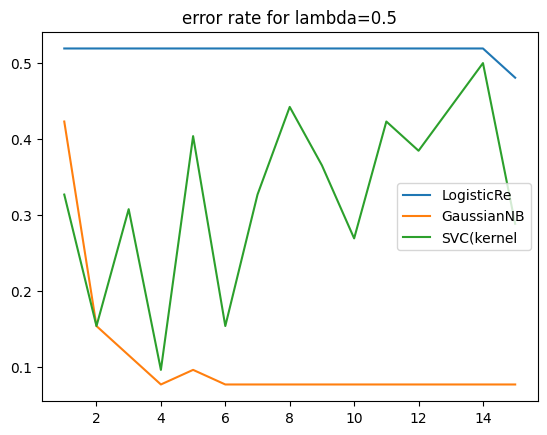

(LogisticRe    15
 GaussianNB     4
 SVC(kernel     4
 dtype: int64,
 LogisticRe    0.480769
 GaussianNB    0.076923
 SVC(kernel    0.096154
 dtype: float64)

In [ ]:
learn_rate = 0.5
for be in base_estimator_list:
    
    dic = {}
    for N in range(1, 16):
        
        clf = AdaBoostClassifier(n_estimators=N, estimator =be, learning_rate=learn_rate)
        clf.fit(X, Y)
        new_x = df_22[["mean_return", "volatility"]].values
        predicted = clf.predict(new_x)
        

        # 1 accuracy
        dic[N] = np.mean(predicted == y_22)
#         print(dic[N])
    df[f"{be}"[:10]] = 1- pd.Series(dic)

# 1 plot for lambda = 0.5
df.plot()
plt.title("error rate for lambda=0.5")
plt.show()

df.idxmin(), df.min()

In [ ]:
# 2
df.idxmin()

# from the result below we can see 
# Logistic best n = 15
# GaussianNB best n = 4
# SVM        best n = 9

LogisticRe    15
GaussianNB     4
SVC(kernel     4
dtype: int64

In [ ]:
# 3. accuracy
1 - df.min()

# from the result below we can see
# accuracy for Gaussian 0.923
# accuracy for LogisticRegression 0.52     
# accuracy for SVM   0.923

LogisticRe    0.519231
GaussianNB    0.923077
SVC(kernel    0.903846
dtype: float64

In [ ]:
# 4  Combine the result for lambda = 1 and lambda = 0.5
# we can see the best estimator here is GaussianNB

In [ ]:
# 5 compare

# fil the GaussianNV with best lambda and N
learn_rate = 0.5
N = 4
        
clf = AdaBoostClassifier(n_estimators=N, estimator=GaussianNB (), learning_rate=learn_rate)
clf.fit(X, Y)
new_x = df_22[["mean_return", "volatility"]].values
predicted = clf.predict(new_x)


In [ ]:


# df
df_detail = pd.read_csv("ZIONO_weekly_return_detailed.csv")
df_detail.head(22)


df_detail_22 = df_detail[["Close", "Week_Number", "Year"]]
df_detail_22 = df_detail_22[df_detail_22.Year == 2022]
df_22_week = df_detail_22.groupby("Week_Number").last()
df_22_week.head()

,Close,Year
Week_Number,,
1,26.290001,2022
2,26.420000,2022
3,26.580000,2022
4,26.090000,2022
5,25.930000,2022


In [ ]:
# buy_and_hold
buy_hold_add = df_22_week.Close.values[-1] - df_22_week.Close.values[0]
buy_hold_add

-0.9200000762939453

In [ ]:
def get_benefit_my_strategy(pred_labels, close_prices):
    money = 100
    hold_share = False
    for i in range(len(pred_labels)): # 1 red
#         print(pred_labels[i], close_prices[i])
        
        if (pred_labels[i] == 1): # red---> if not owning, buy one
            if hold_share:
                pass
            else:
                hold_share = True
                money -= close_prices[i]
        else:           # green ---->if owning, sell it
            if hold_share:
                hold_share = False
                money += close_prices[i]
                
        
    share_value = close_prices[-1] if hold_share else 0
    return money + share_value - 100
                    

get_benefit_my_strategy( predicted.tolist(), df_22_week.Close.values.tolist())

1.9399967193603516

In [ ]:
# we can see it is much better than buy-and-hold